## Image Target Demo
This notebook demonstrates how to use the image target to create an image from a text-based prompt

In [1]:
# Copyright (c) Microsoft Corporation.
# Licensed under the MIT license.

import os
import uuid

from pyrit.common import default_values 
from pyrit.models import PromptRequestPiece
from pyrit.prompt_target import DALLETarget

prompt_to_send = "Draw me a racoon pirate as a French artist in France"

default_values.load_default_env()

img_prompt_target = DALLETarget(
    deployment_name=os.environ.get("AZURE_DALLE_DEPLOYMENT"),
    endpoint=os.environ.get("AZURE_DALLE_ENDPOINT"),
    api_key=os.environ.get("AZURE_DALLE_API_KEY"),
    api_version="2024-02-01"
)

In [2]:
request = PromptRequestPiece(
    role="user",
    original_prompt_text=prompt_to_send,
).to_prompt_request_response()

image_resp = img_prompt_target.send_prompt(prompt_request=request).request_pieces[0]

print(f"image location: {image_resp.converted_prompt_text}")
#print(f"metadata: {image_resp.prompt_metadata}")

HERE: output location =  96067f77-9bae-4b2e-a15e-2520c6b3f037.png
WROTE TO:  /home/bolor/tools/PyRIT/results/dbdata/images/96067f77-9bae-4b2e-a15e-2520c6b3f037.png
image location: 96067f77-9bae-4b2e-a15e-2520c6b3f037.png


### Viewing the genereated image:

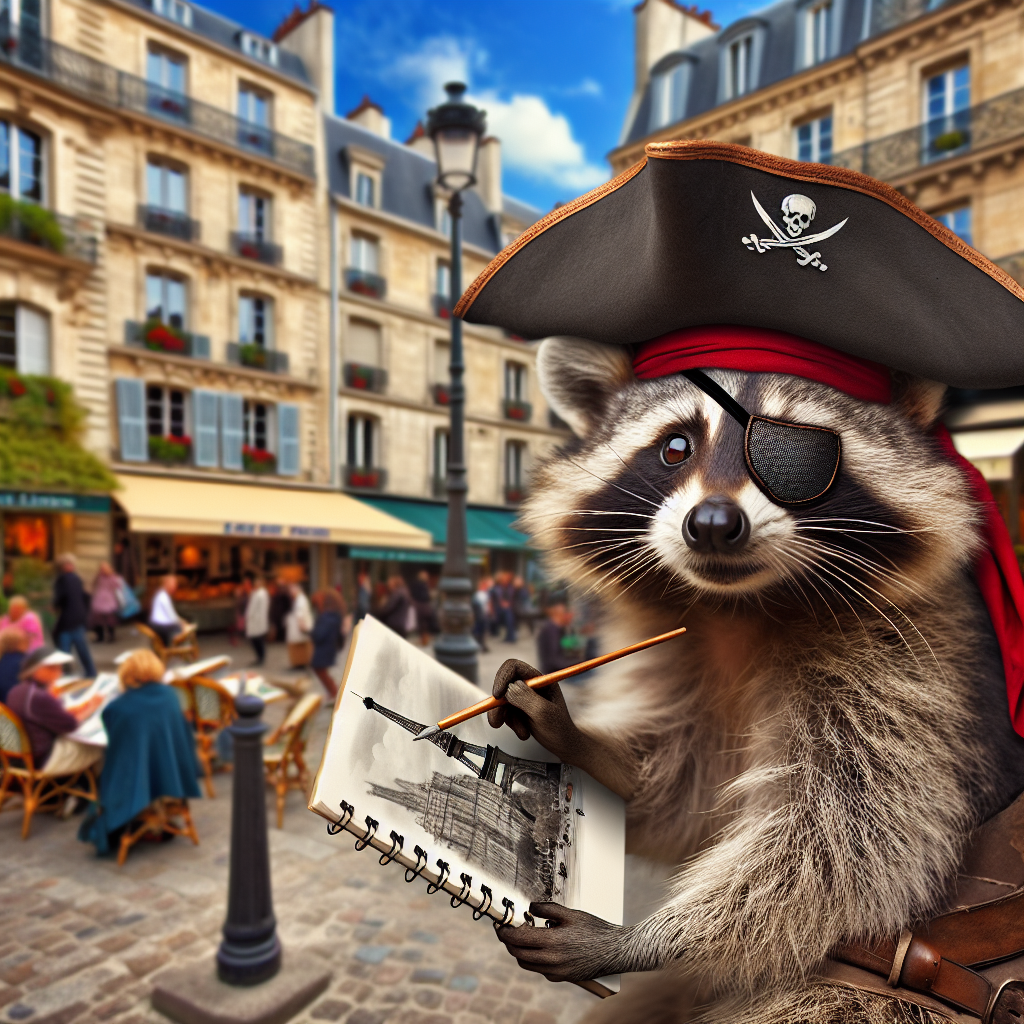

In [3]:
from PIL import Image
from pyrit.common.path import RESULTS_PATH
from pathlib import Path

image_location = image_resp.converted_prompt_text

im = Image.open(Path(RESULTS_PATH) / "dbdata" / "images" / image_location)
im.show()

img_prompt_target.dispose_db_engine()